### Importing all the necessary libraries

In [1]:
# For manipulation and analysis
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For supressing the warnings
import warnings
warnings.filterwarnings(action="ignore")

### Getting the csv file and reading its contents

In [2]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the lead dataframe

In [3]:
# Checking the shape for number of rows and columns
lead.shape

(9240, 37)

In [4]:
# Checking the datatypes of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Missing values treatment

In [6]:
# As mentioned in the case study, there are certain categorical columns which have a level called 'Select' which we need to
# handle as it is in a way null value only

In [7]:
# Lets replace 'Select' values with Nan
lead = lead.replace("Select", np.nan)

In [8]:
# Checking the null count per column
(lead.isnull().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Since "How did you hear about X Education" has more than 40% missing values lets drop it
lead = lead.drop("How did you hear about X Education", axis=1)

In [10]:
# Since "Lead Quality" has more than 40% missing values lets drop it
lead = lead.drop("Lead Quality", axis=1)

In [11]:
# Since "Lead Profile" has more than 40% missing values lets drop it
lead = lead.drop("Lead Profile", axis=1)

In [12]:
# Since "Asymmetrique Activity Index" has more than 40% missing values lets drop it
lead = lead.drop("Asymmetrique Activity Index", axis=1)

In [13]:
# Since "Asymmetrique Profile Index" has more than 40% missing values lets drop it
lead = lead.drop("Asymmetrique Profile Index", axis=1)

In [14]:
# Since "Asymmetrique Activity Score" has more than 40% missing values lets drop it
lead = lead.drop("Asymmetrique Activity Score", axis=1)

In [15]:
# Since "Asymmetrique Profile Score" has more than 40% missing values lets drop it
lead = lead.drop("Asymmetrique Profile Score", axis=1)

In [16]:
# Lets check the null count per column again
(lead.isnull().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [18]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [19]:
# Prospect ID and Lead number are columns which contain unique values and wont help in the analysis in any way 
# as it is just for id purpose so we can drop them
lead = lead.drop(["Prospect ID", "Lead Number"], axis=1)

In [20]:
# Lets check the null count per column again
(lead.isnull().sum()/len(lead))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [21]:
# Lets fix the missing values for categorical columns first

In [23]:
lead["Lead Source"].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [24]:
# Since "Lead Source" has 0.38% missing values lets impute it with "Google" as it occurs most frequently
lead["Lead Source"] = lead["Lead Source"].replace(np.nan, "Google")

In [25]:
# As per observation, there is google with 2 different cases so replaced accordingly
lead["Lead Source"] = lead["Lead Source"].replace("google", "Google")

In [26]:
# Since "Lead Activity" has 0.38% missing values lets impute it with mode as it is a categorical column
mod = lead["Last Activity"].mode() # mod here comes out to be "Emain Opened"
lead["Last Activity"] = lead["Last Activity"].replace(np.nan, "Email Opened")

In [27]:
lead["Last Activity"].value_counts(dropna=False)

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [28]:
# Country is a column where we have close to 26% missing data
lead["Country"].value_counts(dropna=False) #After India, NaN has the highest percentage

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [29]:
# Lets change the nan values to "not given"
lead["Country"] = lead["Country"].replace(np.nan, "not given")

In [30]:
# Specialization has 36% missing values
lead["Specialization"].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [31]:
# Nan occupies maximum weightage compared to other and has too many values hence lets drop this column
lead = lead.drop("Specialization", axis=1)

In [32]:
# "What is your current occupation" is a column where we have close to 29% missing data
lead["What is your current occupation"].value_counts(dropna=False) 

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
# Lets change the nan values to "not given"
lead["What is your current occupation"] = lead["What is your current occupation"].replace(np.nan, "not given")

In [34]:
# "What matters most to you in choosing a course" is a column where we have close to 29% missing data
lead["What matters most to you in choosing a course"].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [35]:
lead["What matters most to you in choosing a course"] = lead["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [36]:
# "Tags" is a column where we have close to 36% missing data
lead["Tags"].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [37]:
# Nan occupies maximum weightage compared to other and has too many values hence lets drop this column
lead = lead.drop("Tags", axis=1)

In [38]:
# "City" is a column where we have close to 39% missing data
lead["City"].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [39]:
# Nan occupies maximum weightage compared to other and has too many values hence lets drop this column
lead = lead.drop("City", axis=1)

In [40]:
# Lets check the null count per column again
(lead.isnull().sum()/len(lead))*100

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [41]:
# There are just 2 columns "TotalVisits" and "Page Views Per Visit" where missing values less than 2%, we can drop those rows
lead = lead.dropna()

In [42]:
# Lets check the null count per column again
(lead.isnull().sum()/len(lead))*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Lets drop the columns which are not needed

In [43]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not given,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


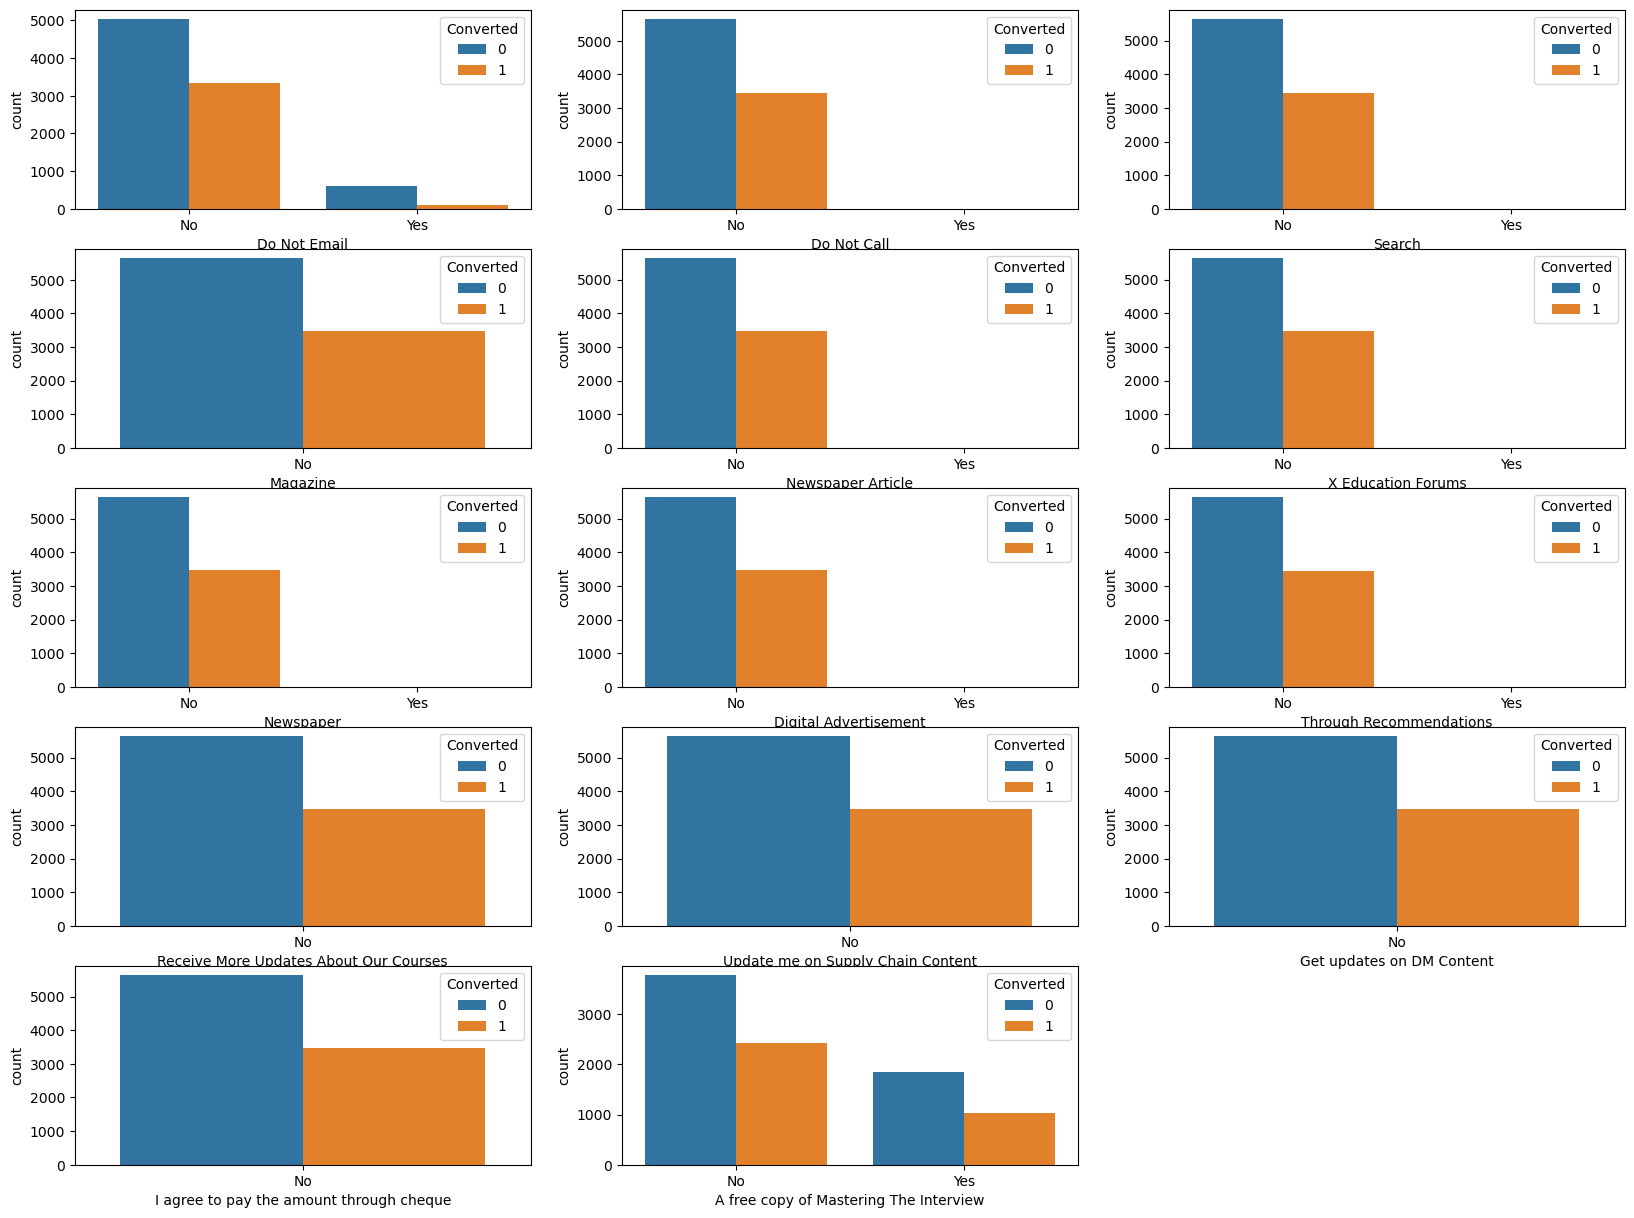

In [44]:
# Lets check the plots of individual categorical variables which has 2 levels i.e. in this case yes or no v/s converted
plt.figure(figsize=(20, 15))
plt.subplot(5,3,1)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = lead)
plt.subplot(5,3,2)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = lead)
plt.subplot(5,3,3)
sns.countplot(x = 'Search', hue = 'Converted', data = lead)
plt.subplot(5,3,4)
sns.countplot(x = 'Magazine', hue = 'Converted', data = lead)
plt.subplot(5,3,5)
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = lead)
plt.subplot(5,3,6)
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = lead)
plt.subplot(5,3,7)
sns.countplot(x = 'Newspaper', hue = 'Converted', data = lead)
plt.subplot(5,3,8)
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = lead)
plt.subplot(5,3,9)
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = lead)
plt.subplot(5,3,10)
sns.countplot(x = 'Receive More Updates About Our Courses', hue = 'Converted', data = lead)
plt.subplot(5,3,11)
sns.countplot(x = 'Update me on Supply Chain Content', hue = 'Converted', data = lead)
plt.subplot(5,3,12)
sns.countplot(x = 'Get updates on DM Content', hue = 'Converted', data = lead)
plt.subplot(5,3,13)
sns.countplot(x = 'I agree to pay the amount through cheque', hue = 'Converted', data = lead)
plt.subplot(5,3,14)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = lead)
plt.show()

In [45]:
# Columns like 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
# 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
# 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Do Not Call' have highly skewed data as we can see from top visualization i.e. high data imbalance so these wont help much
# in the analysis so lets drop them. Coming to 'A free copy of Mastering The Interview' conversiom rate is very low so no
# point of considering it in the analsyis

lead = lead.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                  'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                  'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
                  'Do Not Call'], axis=1) 

In [46]:
#Lets see other categorical variables
lead["Lead Origin"].value_counts() #looks well distributed

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

In [47]:
#Lets see other categorical variables
lead["Lead Source"].value_counts() #looks well distributed

Lead Source
Google               2902
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [48]:
#Lets see other categorical variables
lead["Last Activity"].value_counts() #looks well distributed

Last Activity
Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [49]:
#Lets see other categorical variables
lead["Country"].value_counts() #looks highly skewed with India taking up a lot which wont help in analysis

Country
India                   6492
not given               2324
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [50]:
#Lets drop country variable
lead = lead.drop(['Country'], axis=1) 

In [51]:
#Lets see other categorical variables
lead["What is your current occupation"].value_counts() #looks well distributed

What is your current occupation
Unemployed              5502
not given               2683
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [52]:
#Lets see other categorical variables
lead["What matters most to you in choosing a course"].value_counts() #looks heavily skewed distributed

What matters most to you in choosing a course
Better Career Prospects      9101
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [53]:
#Lets remove "What matters most to you in choosing a course"
lead = lead.drop("What matters most to you in choosing a course", axis=1)

In [54]:
#Lets see other categorical variables
lead["Last Notable Activity"].value_counts() #looks well distributed

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [55]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   Last Activity                    9103 non-null   object 
 8   What is your current occupation  9103 non-null   object 
 9   Last Notable Activity            9103 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 782.3+ KB


### Lets analyse the converted column

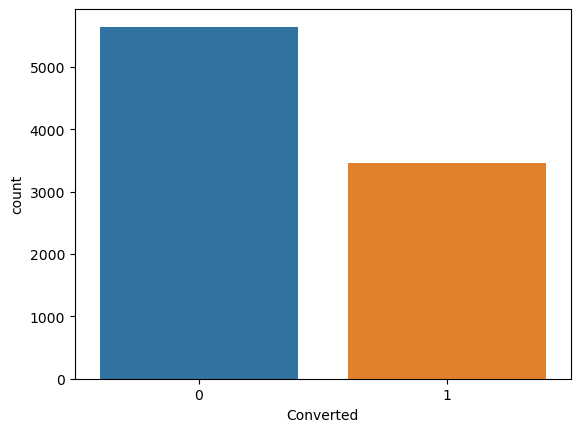

In [56]:
sns.countplot(x="Converted", data=lead)
plt.show()

In [57]:
# Finding out conversion rate
sum(lead['Converted'])/len(lead['Converted'])*100

38.02043282434362

### Lets check the correlation

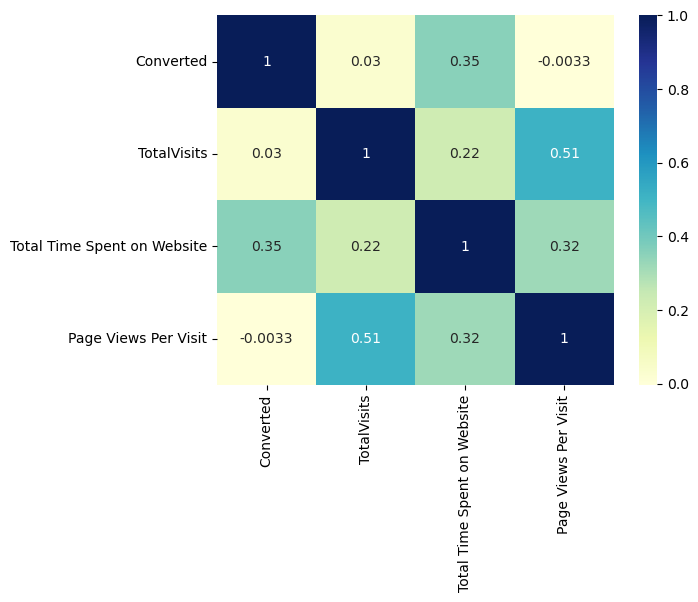

In [58]:
lead1 = lead[["Converted", "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]
sns.heatmap(lead1.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Detection of outliers and removal

In [59]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified


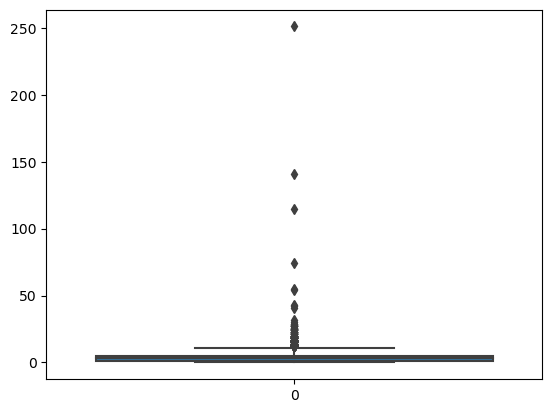

In [60]:
#Lets look at the TotalVisits column
sns.boxplot(lead.TotalVisits)
plt.show()

In [61]:
# We can see there are lot of outliers so lets see the percentile distribution to understand the flow
lead.TotalVisits.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [62]:
# Lets perform the treatment by capping
percentile = lead['TotalVisits'].quantile([0.05, 0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentile[0]] = percentile[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentile[1]] = percentile[1]

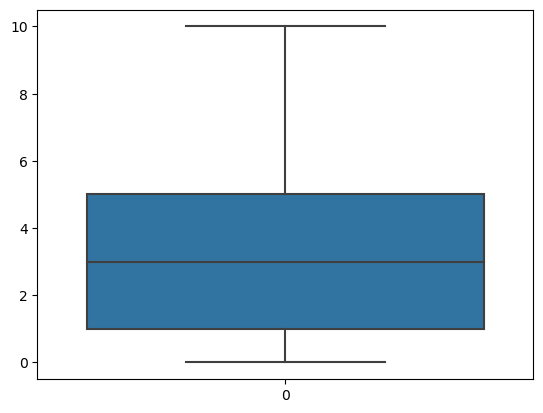

In [63]:
sns.boxplot(lead.TotalVisits)
plt.show() # Outliers are gone

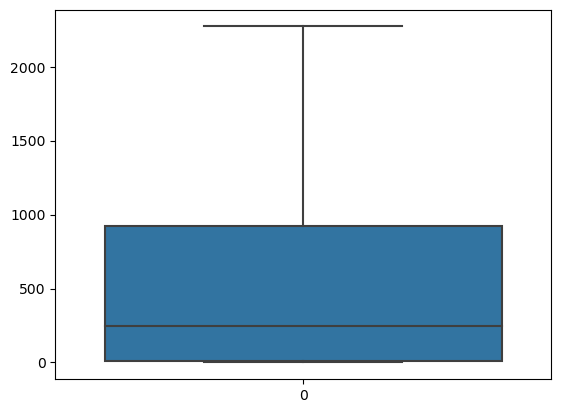

In [64]:
#Lets look at the "Total Time Spent on Website" column
sns.boxplot(lead["Total Time Spent on Website"])
plt.show() # As such no outliers can be observed so outlier treatment isnt required

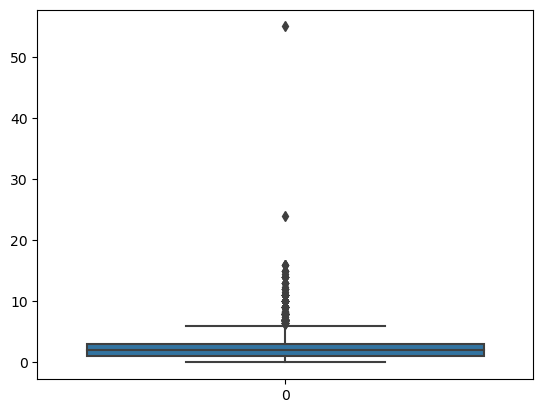

In [65]:
#Lets look at the "Page Views Per Visit" column
sns.boxplot(lead["Page Views Per Visit"])
plt.show() 

In [66]:
# We can see there are lot of outliers so lets see the percentile distribution to understand the flow
lead["Page Views Per Visit"].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [67]:
# Lets perform the treatment by capping
percentile = lead['Page Views Per Visit'].quantile([0.05, 0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentile[0]] = percentile[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentile[1]] = percentile[1]

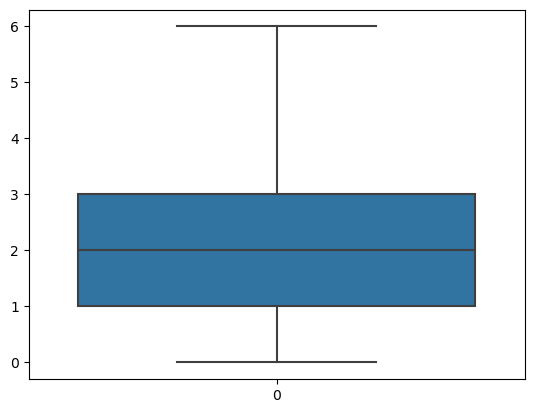

In [68]:
sns.boxplot(lead["Page Views Per Visit"])
plt.show() 

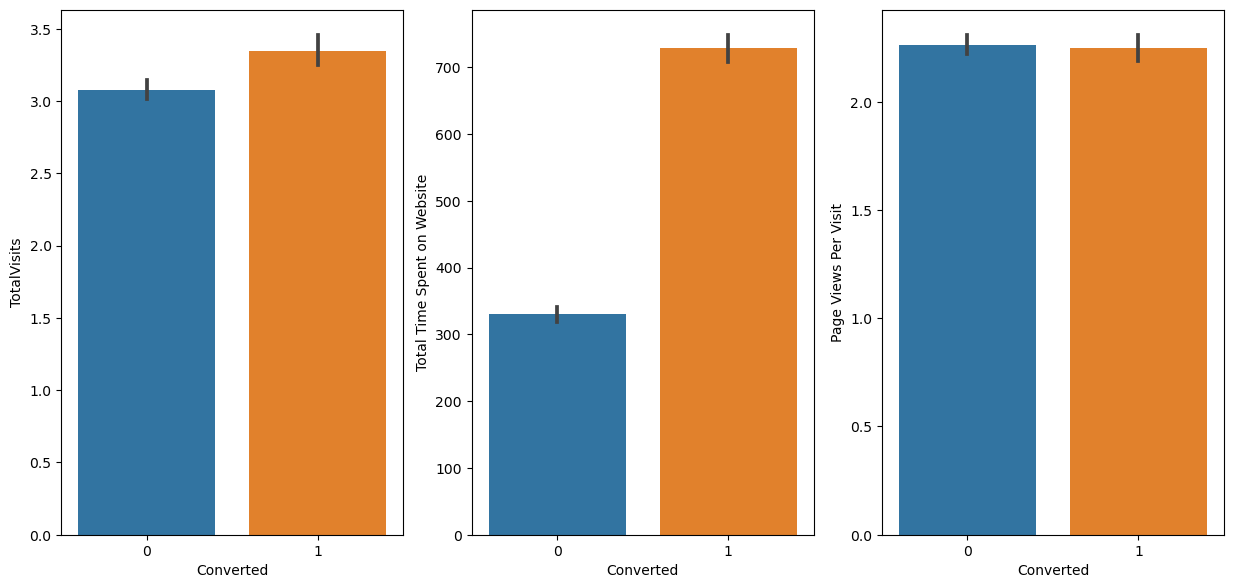

In [69]:
# Lets check the conversion rate for all the numeric values

plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.barplot(x='Converted', y = 'TotalVisits', data = lead)
plt.subplot(2,3,2)
sns.barplot(x='Converted', y = 'Total Time Spent on Website', data = lead)
plt.subplot(2,3,3)
sns.barplot(x='Converted', y = 'Page Views Per Visit', data = lead)
plt.show()

### Data Preparation

In [70]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified


In [71]:
# Lets  map the "Do Not Email" column i.e. yes/no to 1/0
lead["Do Not Email"] = lead["Do Not Email"].map({'Yes' : 1, 'No' : 0})

In [72]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified


In [73]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   Last Activity                    9103 non-null   object 
 8   What is your current occupation  9103 non-null   object 
 9   Last Notable Activity            9103 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


In [74]:
# Creating a list of dummy variables
cat_col = ["Lead Origin", "Lead Source", "Last Activity", "What is your current occupation", "Last Notable Activity"] 
cat_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

In [75]:
# Lets create the dummies
a = pd.get_dummies(lead["Lead Origin"], drop_first=True, prefix  = 'Lead Origin')
lead = pd.concat([lead, a], axis=1)

a = pd.get_dummies(lead["Lead Source"], drop_first=True, prefix  = 'Lead Source')
lead = pd.concat([lead, a], axis=1)

a = pd.get_dummies(lead["Last Activity"], drop_first=True, prefix  = 'Last Activity')
lead = pd.concat([lead, a], axis=1)

a = pd.get_dummies(lead["What is your current occupation"], drop_first=True, prefix  = "What is your current occupation")
lead = pd.concat([lead, a], axis=1)

a = pd.get_dummies(lead["Last Notable Activity"], drop_first=True, prefix = "Last Notable Activity")
lead = pd.concat([lead, a], axis=1)

In [76]:
# Lets the drop the initial cat col post dummy creation
lead.drop(cat_col, axis=1, inplace=True)

In [77]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,1,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,1,2.0,1428,1.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [78]:
lead.shape

(9103, 64)

### Train - Test Split

In [79]:
# Lets import the library for splitting the data
from sklearn.model_selection import train_test_split

In [80]:
X = lead.drop("Converted", axis=1)
y = lead["Converted"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6372, 63)
(2731, 63)
(6372,)
(2731,)


### Feature scaling

In [83]:
# Lets import the library for scaling
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [85]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,-0.294015,-0.068258,1.476324,-0.423364,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5520,-0.294015,1.362470,-0.771066,2.083179,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1962,-0.294015,0.647106,-0.571257,0.133646,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1566,-0.294015,2.435517,1.393834,0.690655,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
9170,-0.294015,-1.141305,-0.881052,-1.258878,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


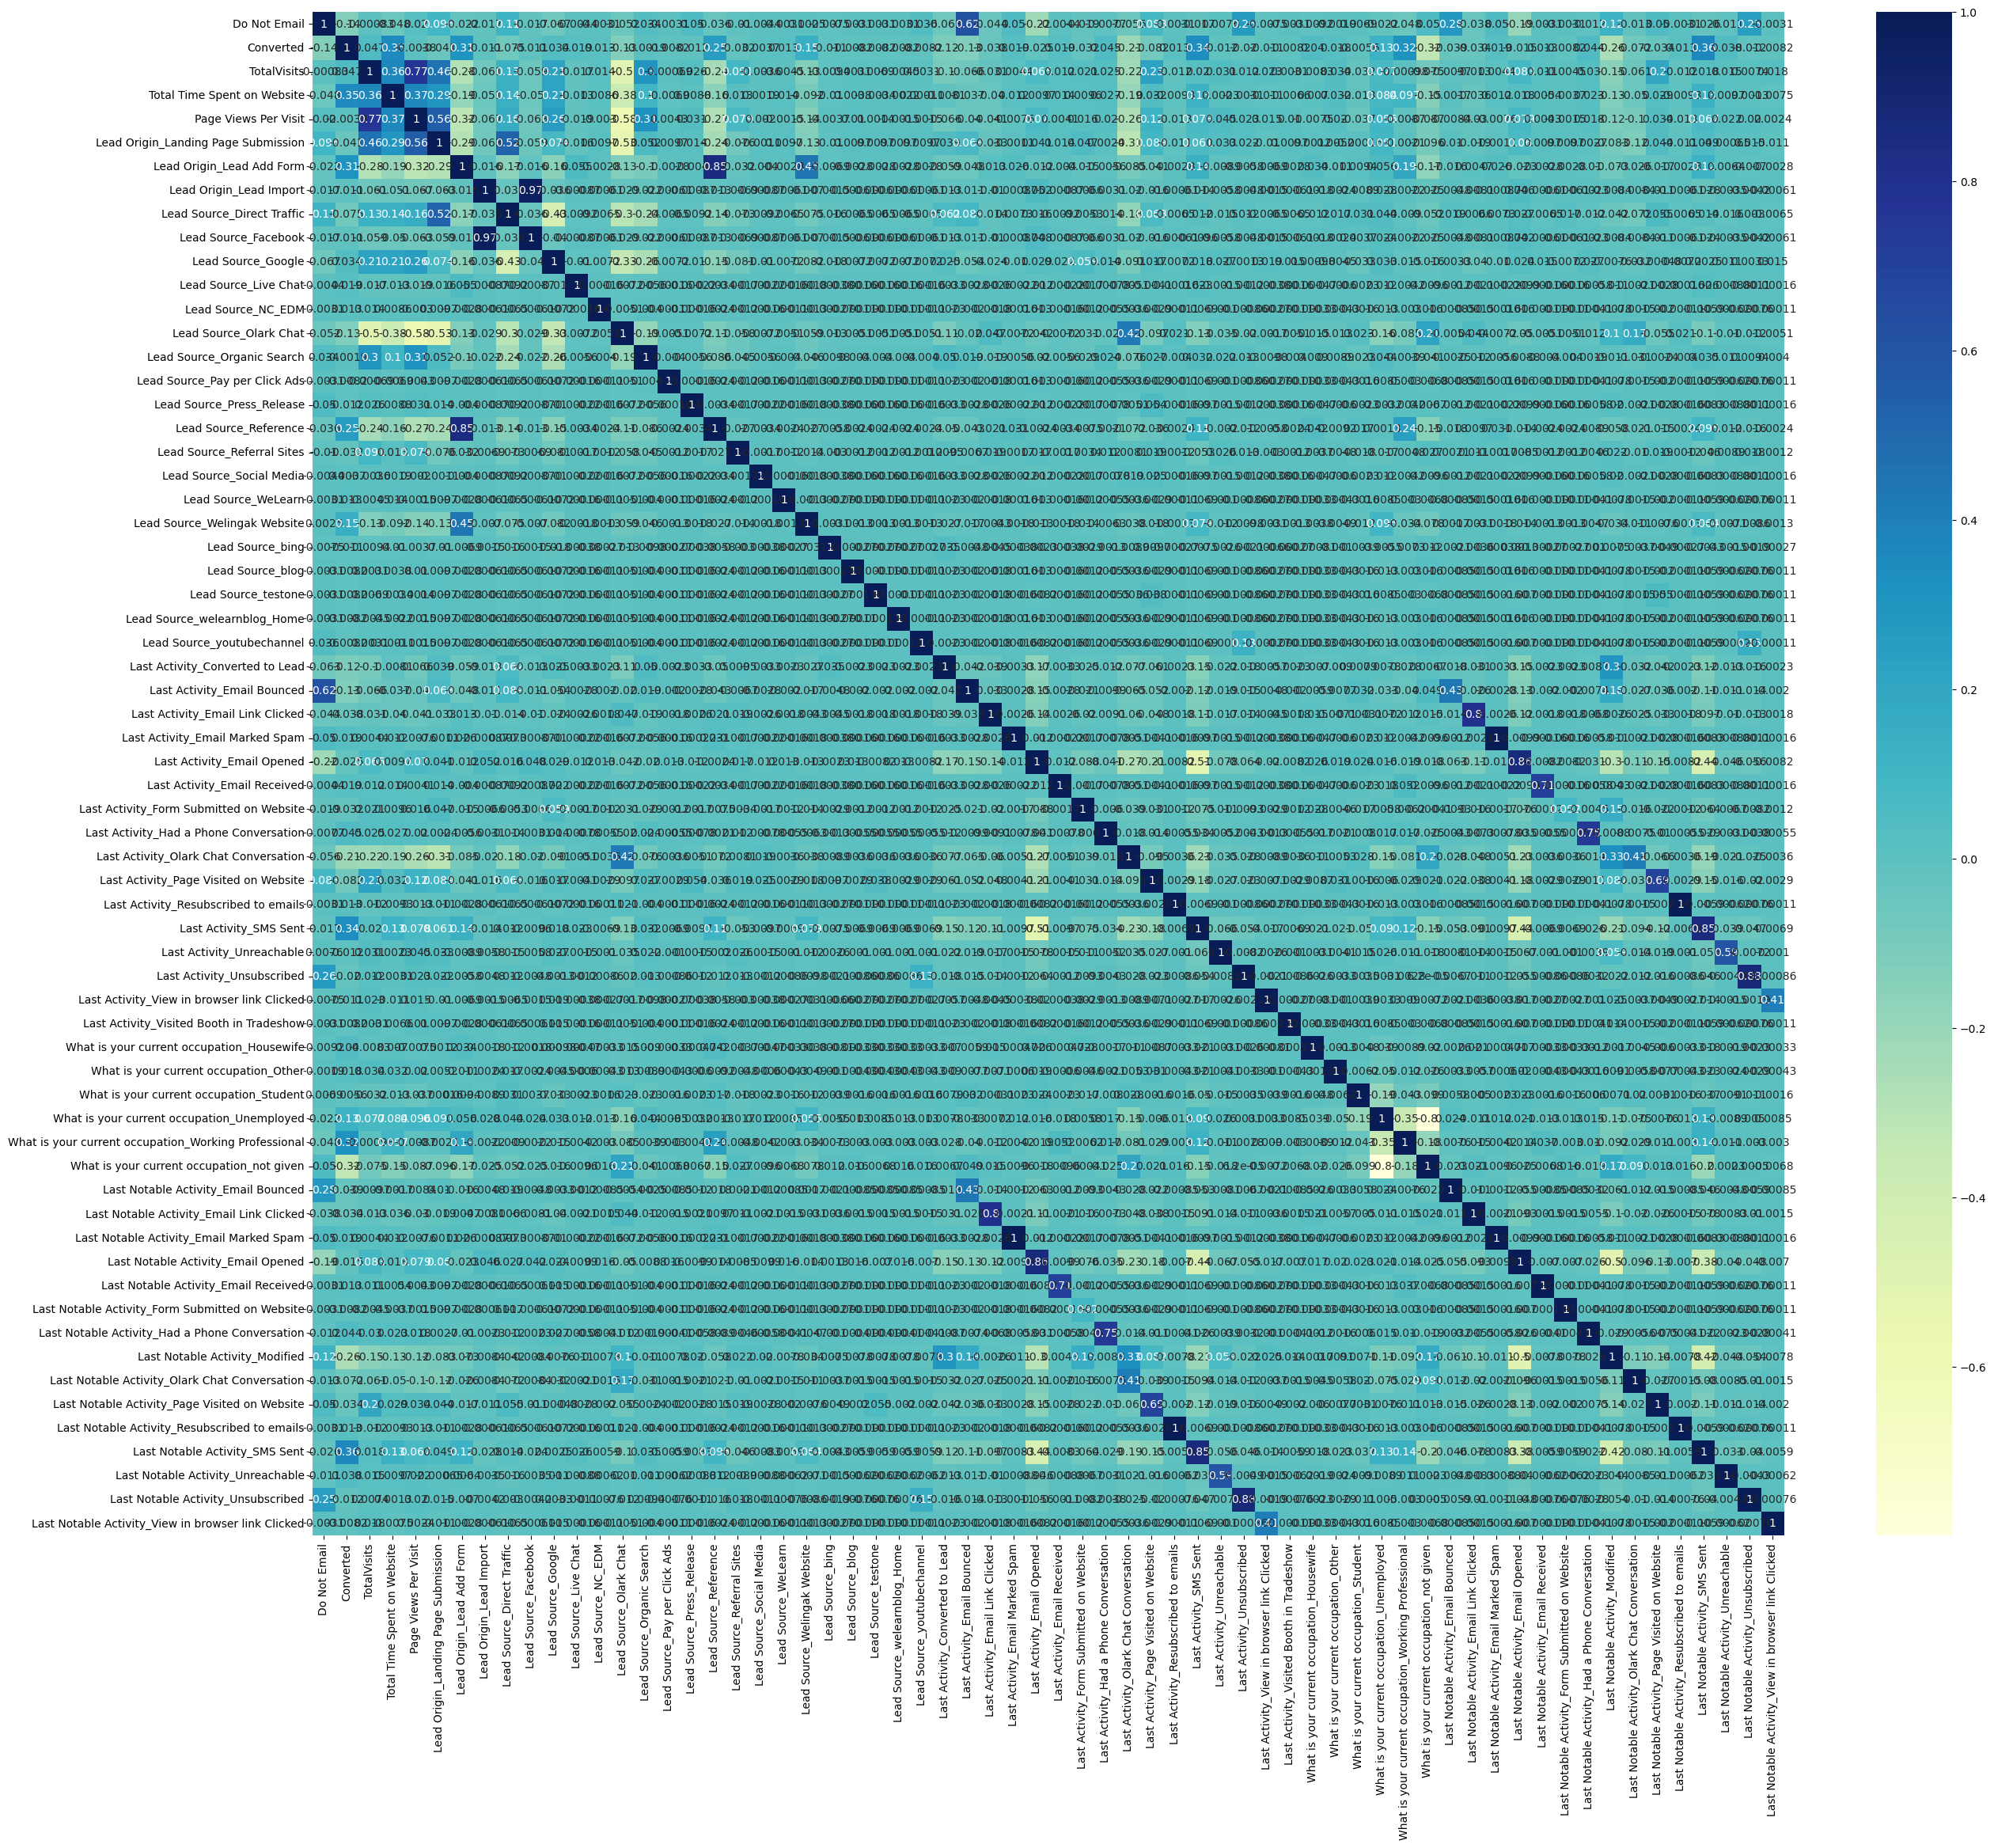

In [86]:
# Lets check the correlation post dummification
plt.figure(figsize = (30,25))
sns.heatmap(lead.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [87]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Las

In [88]:
X_train = X_train.drop(["Last Notable Activity_Email Opened", "Last Notable Activity_Email Received", 
                        "Last Notable Activity_Had a Phone Conversation", "Last Notable Activity_Page Visited on Website",
                        "Last Notable Activity_Resubscribed to emails", "Last Notable Activity_SMS Sent", 
                        "Last Notable Activity_Unreachable", "Last Notable Activity_Unsubscribed", "Last Activity_Email Marked Spam", 
                        "Last Activity_Email Opened", "Last Activity_Email Received", "Last Activity_Had a Phone Conversation",
                        "Last Activity_Email Link Clicked", "Last Activity_Page Visited on Website", "Last Activity_Resubscribed to emails", 
                        "Last Activity_SMS Sent", "Last Activity_Unreachable", "Last Activity_Unsubscribed", "Last Notable Activity_Email Link Clicked", 
                        "Last Notable Activity_Email Marked Spam"], axis=1)

In [89]:
X_test = X_test.drop(["Last Notable Activity_Email Opened", "Last Notable Activity_Email Received", 
                        "Last Notable Activity_Had a Phone Conversation", "Last Notable Activity_Page Visited on Website",
                        "Last Notable Activity_Resubscribed to emails", "Last Notable Activity_SMS Sent", 
                        "Last Notable Activity_Unreachable", "Last Notable Activity_Unsubscribed", "Last Activity_Email Marked Spam", 
                        "Last Activity_Email Opened", "Last Activity_Email Received", "Last Activity_Had a Phone Conversation",
                        "Last Activity_Email Link Clicked", "Last Activity_Page Visited on Website", "Last Activity_Resubscribed to emails", 
                        "Last Activity_SMS Sent", "Last Activity_Unreachable", "Last Activity_Unsubscribed", "Last Notable Activity_Email Link Clicked", 
                        "Last Notable Activity_Email Marked Spam"], axis=1)

### Model Building

In [90]:
import statsmodels.api as sm

In [91]:
# Feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 10),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 20),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 12),
 ('Lead Source_Press_Release', False, 29),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Lead Source_blog', False, 13),
 ('Lead Source_testone', False, 9),
 ('Lead Source_welearnblog_Home', False, 21),
 ('Lead Sourc

In [94]:
# Storing all the RFE supported in cols variable
cols = X_train.columns[rfe.support_]

In [95]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [96]:
# Assessing the model with statsmodels
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.6
Date:                Sat, 17 Feb 2024   Deviance:                       5427.3
Time:                        11:33:25   Pearson chi2:                 6.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3788
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4965      0.048    -10.242      0.000      -0.592      -0.402
Total Time Spent on Website                              1.1181      0.040     28.272      0.000       1.041       1.196
Lead Origin_Lead Add Form                                3.6888      0.220     16.749      0.000       3.257       4.120
Lead Origin_Lead Import                                  0.8978      0.447      2.011      0.044       0.023       1.773
Lead Source_NC_EDM                                      23.3471   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.2240      0.103     11.913      0.000       1.023       1.425
Lead Source_Social Media                                 1.7270      1.419      1.217      0.224      -1.055       4.509
Lead Source_Welingak Website                             1.8742      0.748      2.505      0.012       0.408       3.341
Last Activity_Converted to Lead                         -1.2306      0.222     -5.542      0.000      -1.666      -0.795
Last Activity_Email Bounced                             -2.1385      0.321     -6.661      0.000      -2.768      -1.509
Last Activity_Form Submitted on Website                 -0.5904      0.333     -1.771      0.077      -1.244       0.063
Last Activity_Olark Chat Conversation                   -1.4093      0.169     -8.347      0.000      -1.740      -1.078
What is your current occupation_Housewife               22.6871   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
What is your current occupation_Working Professional     2.5656      0.185     13.873      0.000       2.203       2.928
What is your current occupation_not given               -1.2076      0.085    -14.146      0.000      -1.375      -1.040
Last Notable Activity_Modified                          -0.6741      0.086     -7.865      0.000      -0.842      -0.506
========================================================================================================================
"""

In [97]:
# Lets drop "Lead Source_NC_EDM" as its p-value is very very high
cols = cols.drop('Lead Source_NC_EDM')

In [98]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [99]:
# Lets build another model taking the above cols we got after removing those highly correlated ones
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.8
Date:                Sat, 17 Feb 2024   Deviance:                       5429.6
Time:                        11:33:33   Pearson chi2:                 6.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3785
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4961      0.048    -10.234      0.000      -0.591      -0.401
Total Time Spent on Website                              1.1185      0.040     28.281      0.000       1.041       1.196
Lead Origin_Lead Add Form                                3.6891      0.220     16.750      0.000       3.257       4.121
Lead Origin_Lead Import                                  0.8978      0.447      2.011      0.044       0.023       1.773
Lead Source_Olark Chat                                   1.2229      0.103     11.905      0.000       1.022       1.424
Lead Source_Social Media                                 1.7277      1.419      1.217      0.224      -1.054       4.510
Lead Source_Welingak Website                             1.8742      0.748      2.505      0.012       0.408       3.341
Last Activity_Converted to Lead                         -1.2307      0.222     -5.543      0.000      -1.666      -0.795
Last Activity_Email Bounced                             -2.1389      0.321     -6.662      0.000      -2.768      -1.510
Last Activity_Form Submitted on Website                 -0.5904      0.333     -1.771      0.077      -1.244       0.063
Last Activity_Olark Chat Conversation                   -1.4094      0.169     -8.348      0.000      -1.740      -1.078
What is your current occupation_Housewife               22.6870   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
What is your current occupation_Working Professional     2.5658      0.185     13.872      0.000       2.203       2.928
What is your current occupation_not given               -1.2037      0.085    -14.116      0.000      -1.371      -1.037
Last Notable Activity_Modified                          -0.6753      0.086     -7.880      0.000      -0.843      -0.507
========================================================================================================================
"""

In [100]:
# Lets drop "What is your current occupation_Housewife" as its p-value is very very high
cols = cols.drop('What is your current occupation_Housewife')

In [101]:
# Lets build another model taking the above cols we got after removing those highly correlated ones
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.0
Date:                Sat, 17 Feb 2024   Deviance:                       5440.0
Time:                        11:33:37   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3775
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4915      0.048    -10.152      0.000      -0.586      -0.397
Total Time Spent on Website                              1.1178      0.040     28.293      0.000       1.040       1.195
Lead Origin_Lead Add Form                                3.6866      0.220     16.752      0.000       3.255       4.118
Lead Origin_Lead Import                                  0.8927      0.446      2.000      0.046       0.018       1.768
Lead Source_Olark Chat                                   1.2186      0.103     11.870      0.000       1.017       1.420
Lead Source_Social Media                                 1.7225      1.419      1.214      0.225      -1.059       4.504
Lead Source_Welingak Website                             1.8712      0.748      2.501      0.012       0.405       3.338
Last Activity_Converted to Lead                         -1.2350      0.222     -5.564      0.000      -1.670      -0.800
Last Activity_Email Bounced                             -2.1418      0.321     -6.673      0.000      -2.771      -1.513
Last Activity_Form Submitted on Website                 -0.5164      0.327     -1.581      0.114      -1.157       0.124
Last Activity_Olark Chat Conversation                   -1.4110      0.169     -8.359      0.000      -1.742      -1.080
What is your current occupation_Working Professional     2.5596      0.185     13.846      0.000       2.197       2.922
What is your current occupation_not given               -1.2079      0.085    -14.170      0.000      -1.375      -1.041
Last Notable Activity_Modified                          -0.6738      0.086     -7.872      0.000      -0.842      -0.506
========================================================================================================================
"""

In [102]:
# Lets drop "Lead Source_Social Media" as its p-value is high
cols = cols.drop('Lead Source_Social Media')

In [103]:
# Lets build another model taking the above cols we got after removing those highly correlated ones
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.6
Date:                Sat, 17 Feb 2024   Deviance:                       5441.3
Time:                        11:33:42   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4908      0.048    -10.140      0.000      -0.586      -0.396
Total Time Spent on Website                              1.1174      0.040     28.288      0.000       1.040       1.195
Lead Origin_Lead Add Form                                3.6846      0.220     16.745      0.000       3.253       4.116
Lead Origin_Lead Import                                  0.8911      0.446      1.996      0.046       0.016       1.766
Lead Source_Olark Chat                                   1.2161      0.103     11.850      0.000       1.015       1.417
Lead Source_Welingak Website                             1.8712      0.748      2.501      0.012       0.405       3.338
Last Activity_Converted to Lead                         -1.2378      0.222     -5.578      0.000      -1.673      -0.803
Last Activity_Email Bounced                             -2.1431      0.321     -6.678      0.000      -2.772      -1.514
Last Activity_Form Submitted on Website                 -0.5189      0.327     -1.589      0.112      -1.159       0.121
Last Activity_Olark Chat Conversation                   -1.4033      0.168     -8.330      0.000      -1.734      -1.073
What is your current occupation_Working Professional     2.5582      0.185     13.841      0.000       2.196       2.920
What is your current occupation_not given               -1.2090      0.085    -14.187      0.000      -1.376      -1.042
Last Notable Activity_Modified                          -0.6711      0.086     -7.845      0.000      -0.839      -0.503
========================================================================================================================
"""

In [104]:
# Lets drop "Lead Origin_Lead Import" as its p-value is high
cols = cols.drop('Lead Origin_Lead Import')

In [105]:
# Lets build another model taking the above cols we got after removing those highly correlated ones
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.4
Date:                Sat, 17 Feb 2024   Deviance:                       5444.9
Time:                        11:33:47   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3770
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4819      0.048    -10.016      0.000      -0.576      -0.388
Total Time Spent on Website                              1.1103      0.039     28.279      0.000       1.033       1.187
Lead Origin_Lead Add Form                                3.6693      0.220     16.690      0.000       3.238       4.100
Lead Source_Olark Chat                                   1.2025      0.102     11.759      0.000       1.002       1.403
Lead Source_Welingak Website                             1.8713      0.748      2.501      0.012       0.405       3.338
Last Activity_Converted to Lead                         -1.2424      0.222     -5.604      0.000      -1.677      -0.808
Last Activity_Email Bounced                             -2.1462      0.321     -6.692      0.000      -2.775      -1.518
Last Activity_Form Submitted on Website                 -0.5231      0.326     -1.604      0.109      -1.162       0.116
Last Activity_Olark Chat Conversation                   -1.4049      0.168     -8.345      0.000      -1.735      -1.075
What is your current occupation_Working Professional     2.5596      0.185     13.856      0.000       2.198       2.922
What is your current occupation_not given               -1.2117      0.085    -14.232      0.000      -1.379      -1.045
Last Notable Activity_Modified                          -0.6699      0.086     -7.832      0.000      -0.838      -0.502
========================================================================================================================
"""

In [106]:
# Lets drop "Lead Origin_Lead Import" as its p-value is high
cols = cols.drop('Last Activity_Form Submitted on Website')

In [107]:
# Lets build another model taking the above cols we got after removing those highly correlated ones
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.8
Date:                Sat, 17 Feb 2024   Deviance:                       5447.5
Time:                        11:33:51   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3768
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4824      0.048    -10.027      0.000      -0.577      -0.388
Total Time Spent on Website                              1.1094      0.039     28.264      0.000       1.032       1.186
Lead Origin_Lead Add Form                                3.6713      0.220     16.702      0.000       3.240       4.102
Lead Source_Olark Chat                                   1.2025      0.102     11.755      0.000       1.002       1.403
Lead Source_Welingak Website                             1.8770      0.748      2.509      0.012       0.411       3.343
Last Activity_Converted to Lead                         -1.2101      0.221     -5.481      0.000      -1.643      -0.777
Last Activity_Email Bounced                             -2.1267      0.321     -6.633      0.000      -2.755      -1.498
Last Activity_Olark Chat Conversation                   -1.3827      0.168     -8.238      0.000      -1.712      -1.054
What is your current occupation_Working Professional     2.5520      0.184     13.843      0.000       2.191       2.913
What is your current occupation_not given               -1.2106      0.085    -14.222      0.000      -1.377      -1.044
Last Notable Activity_Modified                          -0.7004      0.084     -8.374      0.000      -0.864      -0.536
========================================================================================================================
"""

In [108]:
# Lets drop "Lead Origin_Lead Import" as its p-value is high
cols = cols.drop('Lead Source_Welingak Website')

In [109]:
# Lets build another model taking the above cols we got after removing those highly correlated ones
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.8
Date:                Sat, 17 Feb 2024   Deviance:                       5457.7
Time:                        11:33:55   Pearson chi2:                 6.34e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4816      0.048    -10.012      0.000      -0.576      -0.387
Total Time Spent on Website                              1.1091      0.039     28.261      0.000       1.032       1.186
Lead Origin_Lead Add Form                                3.9983      0.210     19.069      0.000       3.587       4.409
Lead Source_Olark Chat                                   1.2014      0.102     11.747      0.000       1.001       1.402
Last Activity_Converted to Lead                         -1.2062      0.221     -5.466      0.000      -1.639      -0.774
Last Activity_Email Bounced                             -2.0971      0.316     -6.644      0.000      -2.716      -1.478
Last Activity_Olark Chat Conversation                   -1.3781      0.167     -8.231      0.000      -1.706      -1.050
What is your current occupation_Working Professional     2.5415      0.185     13.769      0.000       2.180       2.903
What is your current occupation_not given               -1.2108      0.085    -14.226      0.000      -1.378      -1.044
Last Notable Activity_Modified                          -0.7035      0.084     -8.418      0.000      -0.867      -0.540
========================================================================================================================
"""

In [110]:
# Now all the p-values look good

In [111]:
# Lets calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].astype(float).values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_Modified,1.82
2,Lead Source_Olark Chat,1.61
5,Last Activity_Olark Chat Conversation,1.60
7,What is your current occupation_not given,1.36
3,Last Activity_Converted to Lead,1.22
0,Total Time Spent on Website,1.21
1,Lead Origin_Lead Add Form,1.13
4,Last Activity_Email Bounced,1.11
6,What is your current occupation_Working Profes...,1.10


In [112]:
# VIF values look good

### Predicting a train model

In [113]:
# Lets get the prediction on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

7962    0.760560
5520    0.208037
1962    0.139594
1566    0.973552
9170    0.436014
5097    0.187216
8954    0.338053
309     0.284127
5519    0.187216
1050    0.680319
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.76056039, 0.20803726, 0.13959403, 0.97355177, 0.43601364,
       0.1872162 , 0.33805335, 0.28412675, 0.1872162 , 0.68031902])

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['AID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,AID
0,0,0.760560,7962
1,0,0.208037,5520
2,0,0.139594,1962
3,1,0.973552,1566
4,0,0.436014,9170


In [116]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,AID,Predicted
0,0,0.760560,7962,1
1,0,0.208037,5520,0
2,0,0.139594,1962,0
3,1,0.973552,1566,1
4,0,0.436014,9170,0


### Metrics: Confusion matrix, Accuracy score, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [117]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print(confusion)

[[3550  403]
 [ 844 1575]]


In [118]:
# Accuracy is as follows:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8043000627746391


In [119]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Sensitivity is as follows:
TP / float(TP+FN)

0.6510954940057875

In [121]:
# Specificity is as follows:
TN / float(TN+FP)

0.8980521123197571

In [122]:
# False Postive Rate is as follows (predicting conversion when customer does not have convert)
print(FP/ float(TN+FP))

0.10194788768024285


In [123]:
# Positive predictive value is as follows:
print (TP / float(TP+FP))

0.7962588473205258


In [124]:
# Negative predictive value is as follows:
print (TN / float(TN+ FN))

0.8079198907601275


### Plotting ROC curve

In [125]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False)

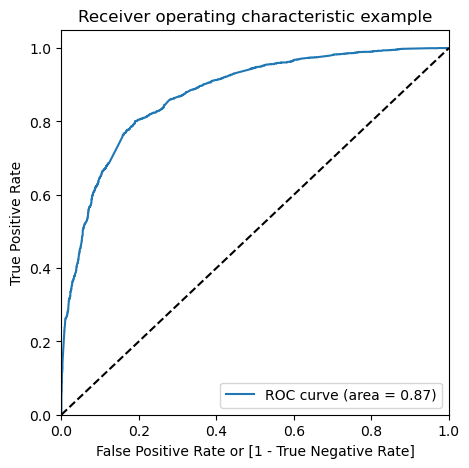

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding optimal cut-off point

In [128]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,AID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.760560,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.208037,5520,0,1,1,1,0,0,0,0,0,0,0
2,0,0.139594,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.973552,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.436014,9170,0,1,1,1,1,1,0,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.379630     1.000000     0.000000
0.1   0.1  0.594005     0.973543     0.361751
0.2   0.2  0.712492     0.916908     0.587402
0.3   0.3  0.782015     0.824308     0.756135
0.4   0.4  0.810421     0.774287     0.832532
0.5   0.5  0.804300     0.651095     0.898052
0.6   0.6  0.795355     0.589086     0.921579
0.7   0.7  0.775267     0.497726     0.945105
0.8   0.8  0.742938     0.378255     0.966102
0.9   0.9  0.711551     0.255891     0.990387


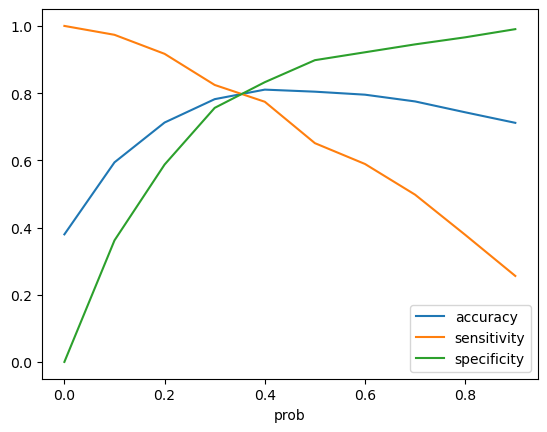

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [131]:
# Looks from above curve- 0.3 is a good optimal cut-off point

In [132]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,AID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.760560,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.208037,5520,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.139594,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.973552,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.436014,9170,0,1,1,1,1,1,0,0,0,0,0,1


In [133]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','AID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,AID,final_Predicted,Lead_Score
0,0,0.760560,7962,1,76
1,0,0.208037,5520,0,21
2,0,0.139594,1962,0,14
3,1,0.973552,1566,1,97
4,0,0.436014,9170,1,44


In [134]:
check = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
check['final_Predicted'].value_counts()

final_Predicted
1    1994
0     425
Name: count, dtype: int64

In [135]:
1994/float(1994 + 425)

0.8243075651095494

In [136]:
# The CEO had given a ballpark of the target lead conversion rate to be around 80% and we have acheived close to 82%

In [137]:
# Lets check the metrics again

In [138]:
print("The accuracy is ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

The accuracy is  0.782015065913371


In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[2989,  964],
       [ 425, 1994]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
print("The sensitivity is ", TP / float(TP+FN))

The sensitivity is  0.8243075651095494


In [142]:
print("The specificity is ", TN / float(TN+FP))

The specificity is  0.7561345813306349


In [143]:
print("The false positive rate is", FP/ float(TN+FP))

The false positive rate is 0.24386541866936504


In [144]:
print("The positive predictive value is", TP / float(TP+FP))

The positive predictive value is 0.6741041244083841


In [145]:
print("The negative predictive value is", TN / float(TN+ FN))

The negative predictive value is 0.8755125951962507


In [146]:
# Lets check the precision and recall
from sklearn.metrics import precision_score, recall_score

In [147]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6741041244083841

In [148]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8243075651095494

### Predictions on test set

In [149]:
num_cols = X_test.select_dtypes(include=['float64','int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not given,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
3504,-0.294015,-0.068258,-0.103815,0.412150,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4050,-0.294015,-1.141305,-0.881052,-1.258878,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7201,3.401183,-0.425940,0.424120,-0.144859,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1196,-0.294015,0.289424,-0.105648,0.969160,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8219,-0.294015,1.362470,-0.428274,-0.284112,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [150]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,What is your current occupation_not given,Last Notable Activity_Modified
3504,-0.103815,False,False,False,False,False,False,False,False
4050,-0.881052,True,False,False,False,False,False,False,False
7201,0.424120,False,False,False,False,False,False,False,False
1196,-0.105648,False,False,False,False,False,False,False,False
8219,-0.428274,False,False,False,False,False,False,False,False


In [151]:
X_test_sm = sm.add_constant(X_test)

In [152]:
X_test_sm.shape

(2731, 10)

In [153]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [154]:
y_test_pred[:10]

3504    0.355086
4050    0.926869
7201    0.497192
1196    0.354620
8219    0.277557
8747    0.187216
9048    0.701767
6524    0.140328
7693    0.238682
8187    0.926869
dtype: float64

In [155]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
y_pred_1.head()

,0
3504,0.355086
4050,0.926869
7201,0.497192
1196,0.354620
8219,0.277557


In [157]:
y_test_df = pd.DataFrame(y_test)

In [158]:
y_test_df['AID'] = y_test_df.index

In [159]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,AID,0
0,0,3504,0.355086
1,1,4050,0.926869
2,0,7201,0.497192
3,0,1196,0.354620
4,1,8219,0.277557


In [162]:
y_pred_final= y_pred_final.rename(columns={0 : 'Converted_prob'})

In [163]:
y_pred_final.head()

,Converted,AID,Converted_prob
0,0,3504,0.355086
1,1,4050,0.926869
2,0,7201,0.497192
3,0,1196,0.354620
4,1,8219,0.277557


### Assigning lead score

In [164]:
y_pred_final = y_pred_final[['AID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [165]:
y_pred_final.head()

,AID,Converted,Converted_prob,Lead_Score
0,3504,0,0.355086,36
1,4050,1,0.926869,93
2,7201,0,0.497192,50
3,1196,0,0.354620,35
4,8219,1,0.277557,28


In [166]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [167]:
y_pred_final.head()

,AID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.355086,36,1
1,4050,1,0.926869,93,1
2,7201,0,0.497192,50,1
3,1196,0,0.354620,35,1
4,8219,1,0.277557,28,0


In [168]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

final_Predicted
1    868
0    174
Name: count, dtype: int64

In [169]:
#final_predicted conversions on test data
865/float(865+177)

0.8301343570057581

In [170]:
# We got 83% conversion rate on test data which is good

### Metrics: Confusion matrix, Accuracy score, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [171]:
#Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7868912486268766

In [172]:
#Confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1281,  408],
       [ 174,  868]], dtype=int64)

In [173]:
TP = confusion3[1,1] # true positive
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [174]:
#Sensitivity
TP / float(TP+FN)

0.8330134357005758

In [175]:
#Specificity
TN / float(TN+FP)

0.7584369449378331

In [176]:
#Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6802507836990596

In [177]:
#Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8330134357005758